<center> <h1> <b>MOTOR GESTURES<b></h1> </center>
<center> <h1>Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
%matplotlib ipympl

import birdsongs as bs
from birdsongs.utils import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
# audios_path = "C:\\Users\\sebas\\Documents\\GitHub\\audios\\Dissertation-xeno\\"#rufous-collared-sparrow\\humbolt\\"

paths  = bs.Paths()              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=False)   # to save figures save=True 
#paths.AudioFiles().head()

In [3]:
paths.MG_Files().head()

/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


,id_XC,no_syllable,id,name,coef_path,param_path,audio_path,s,fs
0,XC462515,2,syllable,Rufous-collaredSparrow,../examples/results/MotorGestures-parameters/X...,../examples/results/MotorGestures-parameters/X...,../examples/audios/XC462515 - Rufous-collared ...,"[6.099856526013063e-06, 6.099856526013063e-06,...",44100
1,XC462515,5,syllable,Rufous-collaredSparrow,../examples/results/MotorGestures-parameters/X...,../examples/results/MotorGestures-parameters/X...,../examples/audios/XC462515 - Rufous-collared ...,"[6.099856526013063e-06, 6.099856526013063e-06,...",44100


In [4]:
out = paths.ImportParameters() # all dataset in the folder of motor gestures
df = paths.ImportParameters("XC462515") # paramters: XC, no_file, no_syllable, name
##   df  ->  each element: [no_syllable, DataFrame parameters, coefficients, motor gesture curve]

2 files were found.
2 files were found.


/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)
/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


In [5]:
_, info, coef, msc = df[1]
info

id_XC                                                   XC462515
no_syllable                                                    5
id                                                      syllable
name                                      Rufous-collaredSparrow
coef_path      ../examples/results/MotorGestures-parameters/X...
param_path     ../examples/results/MotorGestures-parameters/X...
audio_path     ../examples/audios/XC462515 - Rufous-collared ...
s              [6.099856526013063e-06, 6.099856526013063e-06,...
fs                                                         44100
t_ini                                                   2.842466
t_end                                                   2.956338
NN                                                         512.0
umbral_FF                                                    1.5
Name: 1, dtype: object

In [ ]:
#paths.data_param.head()
paths.df

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

512

/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


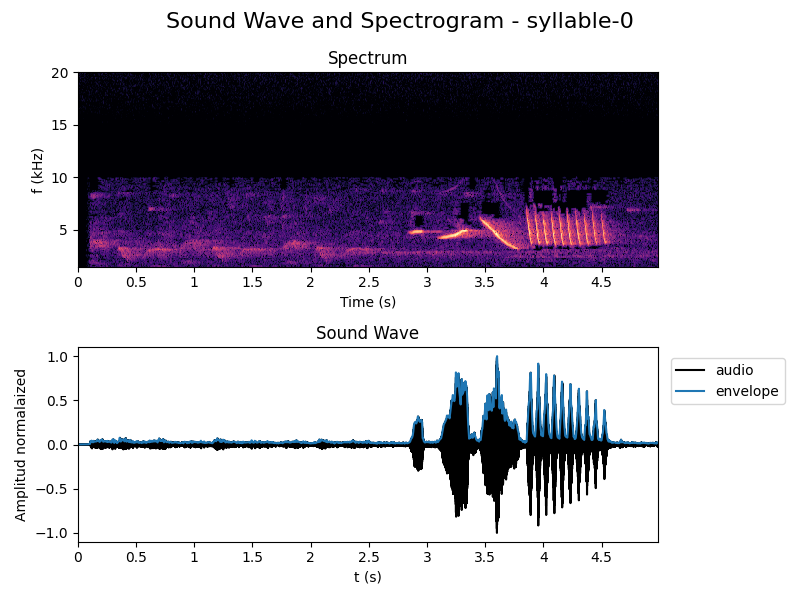

In [13]:
sfs = [info["s"], info["fs"]] # [s, fs]
all_syllable = bs.Syllable(sfs=sfs, paths=paths, tlim=(0.,5.), NN=int(info["NN"]), 
                          umbral_FF=info["umbral_FF"], ide="syllable")
ploter.Plot(all_syllable, FF_on=False);

Define syllable by the previous time interval selected

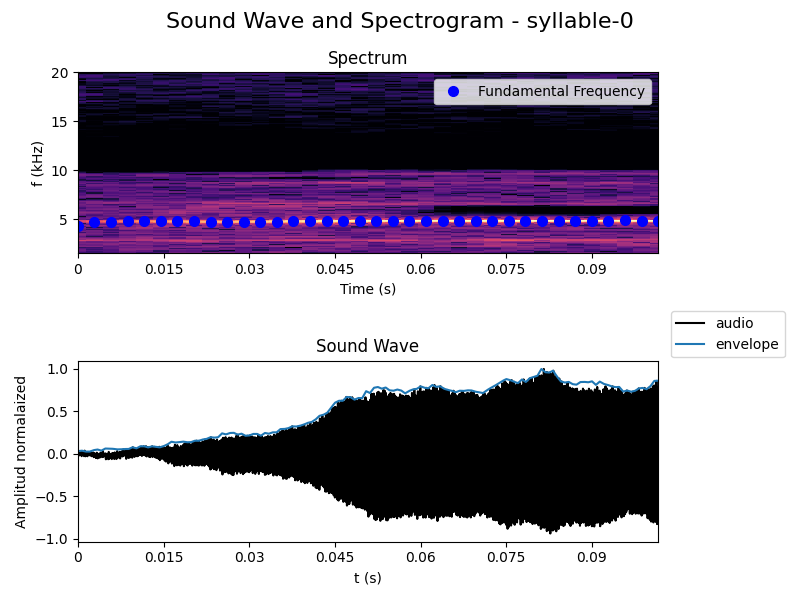

In [15]:
time_interval = [info["t_ini"], info["t_end"]]
syllable = bs.Syllable(sfs=sfs, tlim=time_interval, paths=paths, NN=int(info["NN"]), 
                       umbral_FF=info["umbral_FF"], Nt=30,  ide="syllable")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [ ]:
#plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 2e4));
#syllable.FF

In [32]:
[syllable.p[coef.iloc[i].parameter].set(value=coef.iloc[i].value) for i in range(7)];
syllable.p

name,value,initial value,min,max,vary
a0,0.13000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.05,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.25000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,1.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


In [34]:
synth_syllable = syllable.Solve(syllable.p)

/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


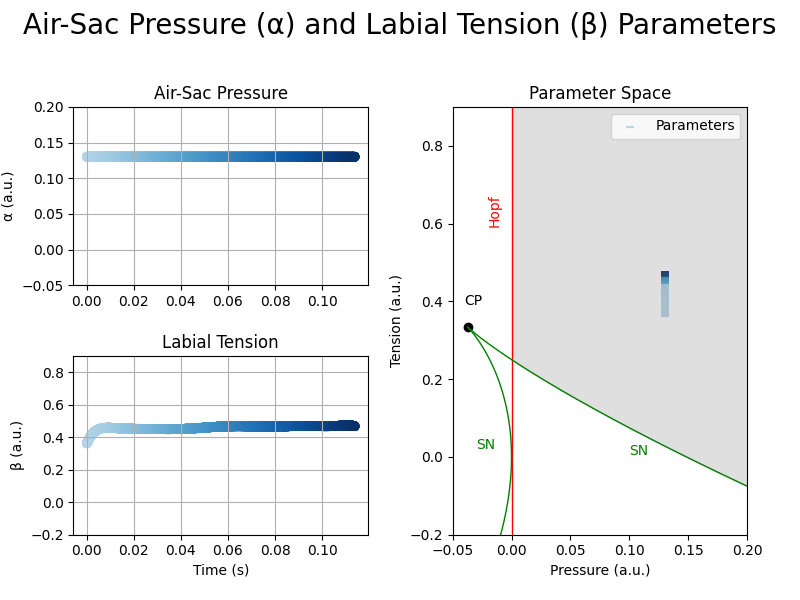

In [35]:
ploter.PlotAlphaBeta(synth_syllable);

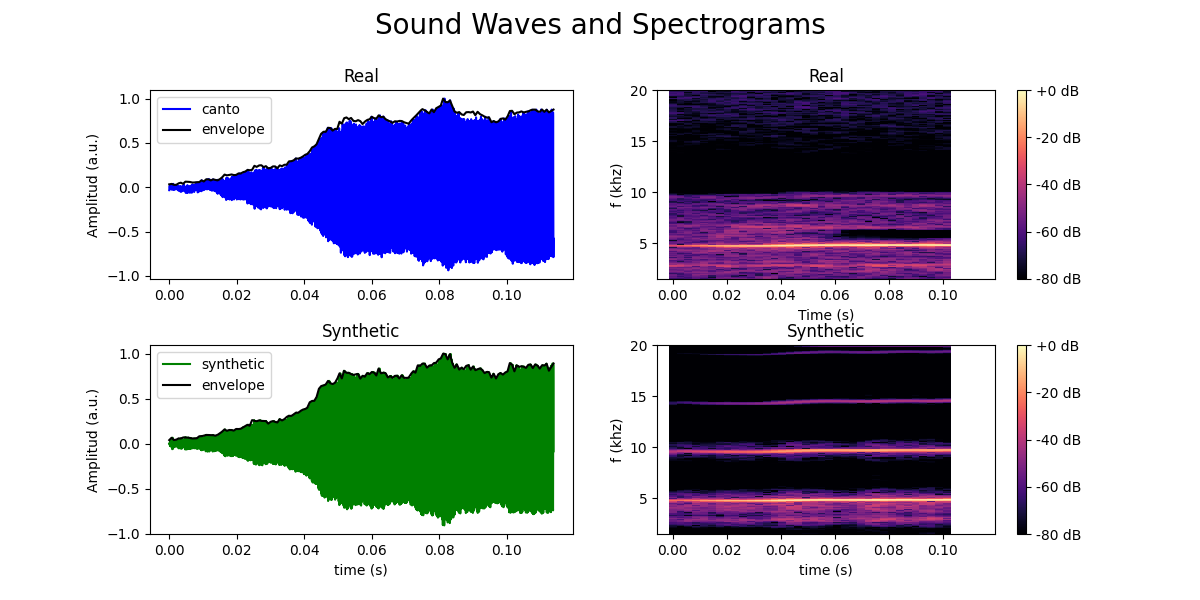

In [37]:
ploter.Syllables(syllable, synth_syllable);